In [2]:
%pip install wandb
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install bokeh

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 24.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: contourpy
    Found existing installation: contourpy 1.1.1
    Uninstalling contourpy-1.1.1:
      Successfully uninstalled contourpy-1.1.1
Note: you may need to restart the kernel to use updated packages.


In [2]:


import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import wandb


In [18]:
# Import pandas library
import pandas as pd

# Read the data into a data frame
data = pd.read_csv("/Users/niklaselsasser/Code/DataVisualization/bd-dec22-deaths-by-sex-and-age.csv")

# Remove rows where Sex contains the string "Total"
data = data[~data["Sex"].str.contains("Total")]

# Remove rows where Age contains the string "Total"
data = data.query("Age != 'Total'")

# Print the resulting data frame
print(data)


# Save the modified data frame to a new CSV file
data.to_csv("new_data.csv", index=False)

     Period     Sex           Age  Count
0      2010    Male        Infant    186
1      2010    Male           1-4     36
2      2010    Male           5-9     12
3      2010    Male         10-14     24
4      2010    Male         15-19    117
..      ...     ...           ...    ...
868    2022  Female         80-84   2907
869    2022  Female         85-89   3201
870    2022  Female         90-94   3147
871    2022  Female         95-99   1593
872    2022  Female  100 and over    372

[572 rows x 4 columns]


In [17]:

wandb.init(project="test-for-B")
from io import BytesIO



wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


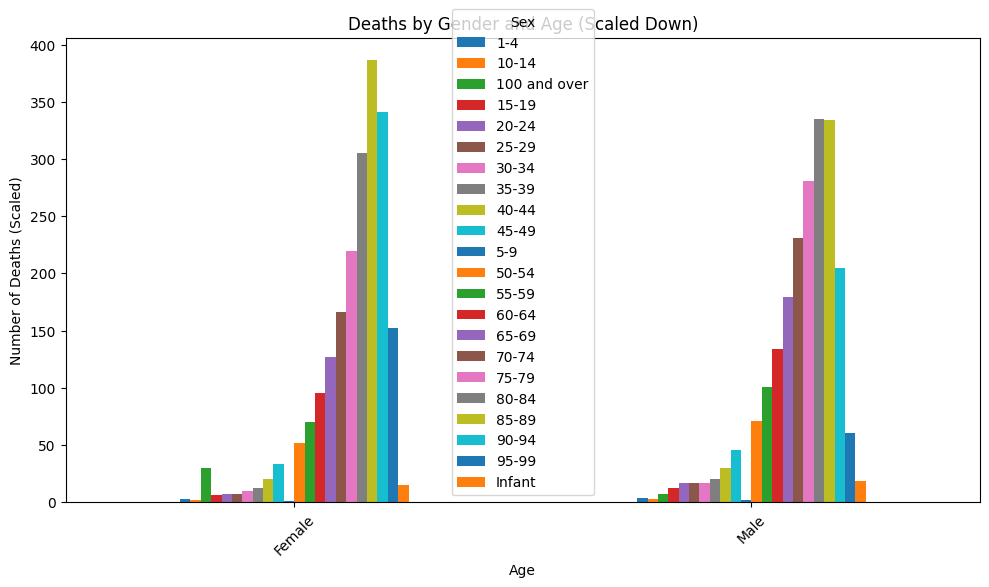

wandb: Network error (ConnectionError), entering retry loop.


In [19]:

#Read the CSV file
df = pd.read_csv('/Users/niklaselsasser/Code/DataVisualization/new_data.csv')


#Filter out the rows with 'All Ages' to focus on specific age groups
df_filtered = df[df['Age'] != 'All Ages']


#Group the data by gender and age and sum the deaths
grouped_data = df_filtered.groupby(['Sex', 'Age']).sum()['Count'].unstack()


#Scale down the values of 'Number of Deaths' by dividing by 100
grouped_data_scaled = grouped_data / 100


#Plotting
grouped_data_scaled.plot(kind='bar', figsize=(10, 6))
plt.title('Deaths by Gender and Age (Scaled Down)')
plt.xlabel('Age')
plt.ylabel('Number of Deaths (Scaled)')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()




#Convert plot to image buffer
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
buf_array = np.array(plt.imread(buf))
#Log the image to Wandb
wandb.log({"grouped_bar_chart": wandb.Image(buf_array)})
#wandb.report(r'C:\Downloads/notes_07/DataVis.ipynb')


In [5]:
import pandas as pd
import plotly.graph_objs as go
import wandb

# Read the CSV file
df = pd.read_csv('/Users/niklaselsasser/Code/DataVisualization/bd-dec22-deaths-by-sex-and-age.csv')

# Filter out the rows with 'All Ages' to focus on specific age groups
df_filtered = df[df['Age'] != 'All Ages']

# Group the data by gender and age and sum the deaths
grouped_data = df_filtered.groupby(['Sex', 'Age']).sum()['Count'].unstack()

# Scale down the values of 'Number of Deaths' by dividing by 100
grouped_data_scaled = grouped_data / 100

# Create traces for each gender
traces = []
for gender in grouped_data_scaled.index:
    trace = go.Bar(
        x=grouped_data_scaled.columns,
        y=grouped_data_scaled.loc[gender],
        name=gender
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Deaths by Gender and Age (Scaled Down)',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Number of Deaths (Scaled)'),
    barmode='group'
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Initialize wandb
#wandb.init(project='your_project_name', entity='your_username')

# Log the interactive plot to Wandb
wandb.log({"interactive_grouped_bar_chart-1": fig})


In [9]:
import pandas as pd
import plotly.graph_objs as go
import wandb

# Read the CSV file
df = pd.read_csv('/Users/niklaselsasser/Code/DataVisualization/bd-dec22-deaths-by-sex-and-age.csv')

# Filter out the rows with 'All Ages' to focus on specific age groups
df_filtered = df[df['Age'] != 'All Ages']

# Reorder the age groups
age_order = ['Infant', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5', 'Age 6', 'Age 7', 'Age 8', 'Age 9', 'Age 10',
             'Age 11', 'Age 12', 'Age 13', 'Age 14', 'Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19']
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Group the data by gender and age and sum the deaths
grouped_data = df_filtered.groupby(['Sex', 'Age']).sum()['Count'].unstack()

# Scale down the values of 'Number of Deaths' by dividing by 100
grouped_data_scaled = grouped_data / 100

# Reindex the columns to have a continuous range from 1 to 100
grouped_data_scaled = grouped_data_scaled.reindex(range(1, 101), axis=1)

# Add a column for total deaths
grouped_data_scaled['Total'] = grouped_data_scaled.sum(axis=1)

# Create traces for each gender
traces = []
for gender in grouped_data_scaled.index:
    trace = go.Bar(
        x=grouped_data_scaled.columns,
        y=grouped_data_scaled.loc[gender],
        name=gender
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Deaths by Gender and Age (Scaled Down)',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Number of Deaths (Scaled)'),
    barmode='group'
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Convert figure to JSON
fig_json = fig.to_json()

# Initialize wandb
#wandb.init(project='your_project_name', entity='your_username')

# Log the interactive plot to Wandb
wandb.log({"interactive_grouped_bar_chart-4": wandb.Html(fig_json, inject=False)})


wandb: Network error (ConnectionError), entering retry loop.


In [6]:

#Finish the Wandb run
#wandb.finish()

In [6]:
from bokeh.plotting import figure, output_file, save, show

# Create your Bokeh plot
p = figure(title="My Interactive Plot", x_axis_label='x', y_axis_label='y')
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

# Specify the output file name
output_file("interactive_plot.html")

# Save the plot as HTML file
save(p)

#show(p)

# Now, you can upload the HTML file as an artifact to WandB
# Follow the documentation of WandB for how to upload artifacts.
